## Omdena Chapter: Algeria
### Green Algeria Project Building an Intelligent Control System for greenhouses


<b> <h4> Dataset: <a href="https://www.kaggle.com/datasets/piantic/autonomous-greenhouse-challengeagc-2nd-2019">  Autonomous Greenhouse Challenge(AGC) 2019~2020 - 2nd Edition </a> </h4> </b>
<br>

Content : 
<br>
<table style="width:70%">
    <tr>
        <th style="width:30%"> File Name </th>
        <th style="width:70%"> Description </th>
    </tr>
    <tr>
        <td> Weather + Greenhouse-Climate </td>
        <td> outdoor and indoor greenhouse climate, irrigation, status of actuators,<br> requested and realized climate setpoints </td>
    </tr>
    <tr>
        <td> Resource </td>
        <td> Resource Consumption </td>
    </tr>
    <tr>
        <td> Production </td>
        <td> Harvest </td>
    </tr>
    <tr>
        <td> Crop-Production </td>
        <td> Crop-related parameters </td>
    </tr>
    <tr>
        <td> TomQuality </td>
        <td> Tomato Quality </td>
    </tr>
    <tr>
        <td> LabAnalysis </td>
        <td> Analysis of irrigation and drain samples </td>
    </tr>
    <tr>
        <td> Grodan-Sens </td>
        <td> Root-zone/slab information </td>
    </tr>
</table>


In [1]:
# This file covers the harvest analysis Greenhouse
# The weather & internal climates are covered in separate file

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path = ("./Dataset")
os.listdir(path)

['AICU',
 'Automatoes',
 'Digilog',
 'Economics.pdf',
 'IUACAAS',
 'ReadMe.pdf',
 'Reference',
 'TheAutomators',
 'Weather']

In [4]:
files = ['AICU', 'Automatoes', 'Digilog', 'IUACAAS', 'Reference', 'TheAutomators']

In [5]:
dataframe = {}
for file in files:
    dataframe[file] = pd.read_csv("./Dataset/"+file+"/CropParameters.csv")

In [6]:
for i in dataframe:
    print(i,"\n",dataframe[i].head(),"\n")
    

AICU 
    %Time Stem_elong  Stem_thick  Cum_trusses  stem_dens   plant_dens
0  43823       18.7         8.3          NaN         3.6         1.8
1  43830       29.9        11.7          1.3         3.6         1.8
2  43838       35.8        13.6          3.2         3.6         1.8
3  43845       35.1        13.5          4.7         3.6         1.8
4  43852       34.7        12.6          5.8         3.6         1.8 

Automatoes 
    %Time Stem_elong  Stem_thick  Cum_trusses  stem_dens   plant_dens
0  43823       14.5         8.1          NaN         3.9        1.95
1  43830       29.5        10.8          1.3         3.9        1.95
2  43838       37.4        12.8          3.0         3.9        1.95
3  43845         34        12.5          4.7         3.9        1.95
4  43852       34.7        10.9          5.9         3.9        1.95 

Digilog 
    %Time Stem_elong  Stem_thick  Cum_trusses  stem_dens   plant_dens
0  43823         15         8.0          NaN         2.6         1.3


In [7]:
for i in dataframe:
    dataframe[i]['%Time'] = pd.to_datetime(dataframe[i]['%Time'], unit='d',origin='1899-12-30')


In [9]:
#as the given data is in time-series format therefor interpolating the data with nearest member to remove null values

for i in dataframe:
    dataframe[i]['Stem_elong'] = dataframe[i]['Stem_elong'].astype(str).astype(float)
    

for i in dataframe:
    dataframe[i] = dataframe[i].fillna(dataframe[i].mean())  
  

C:\Users\vivek\AppData\Local\Temp\ipykernel_21972\624684085.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dataframe[i] = dataframe[i].fillna(dataframe[i].mean())


C:\Users\vivek\AppData\Local\Temp\ipykernel_21972\4174543995.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)


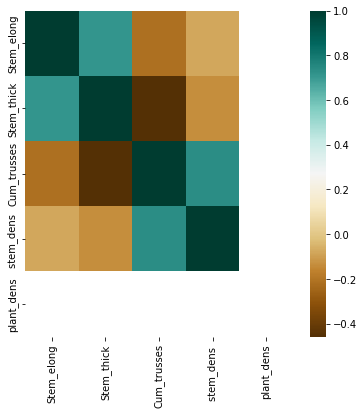

In [13]:
from pandas.plotting import scatter_matrix
df_corr = dataframe['AICU'].corr()

f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

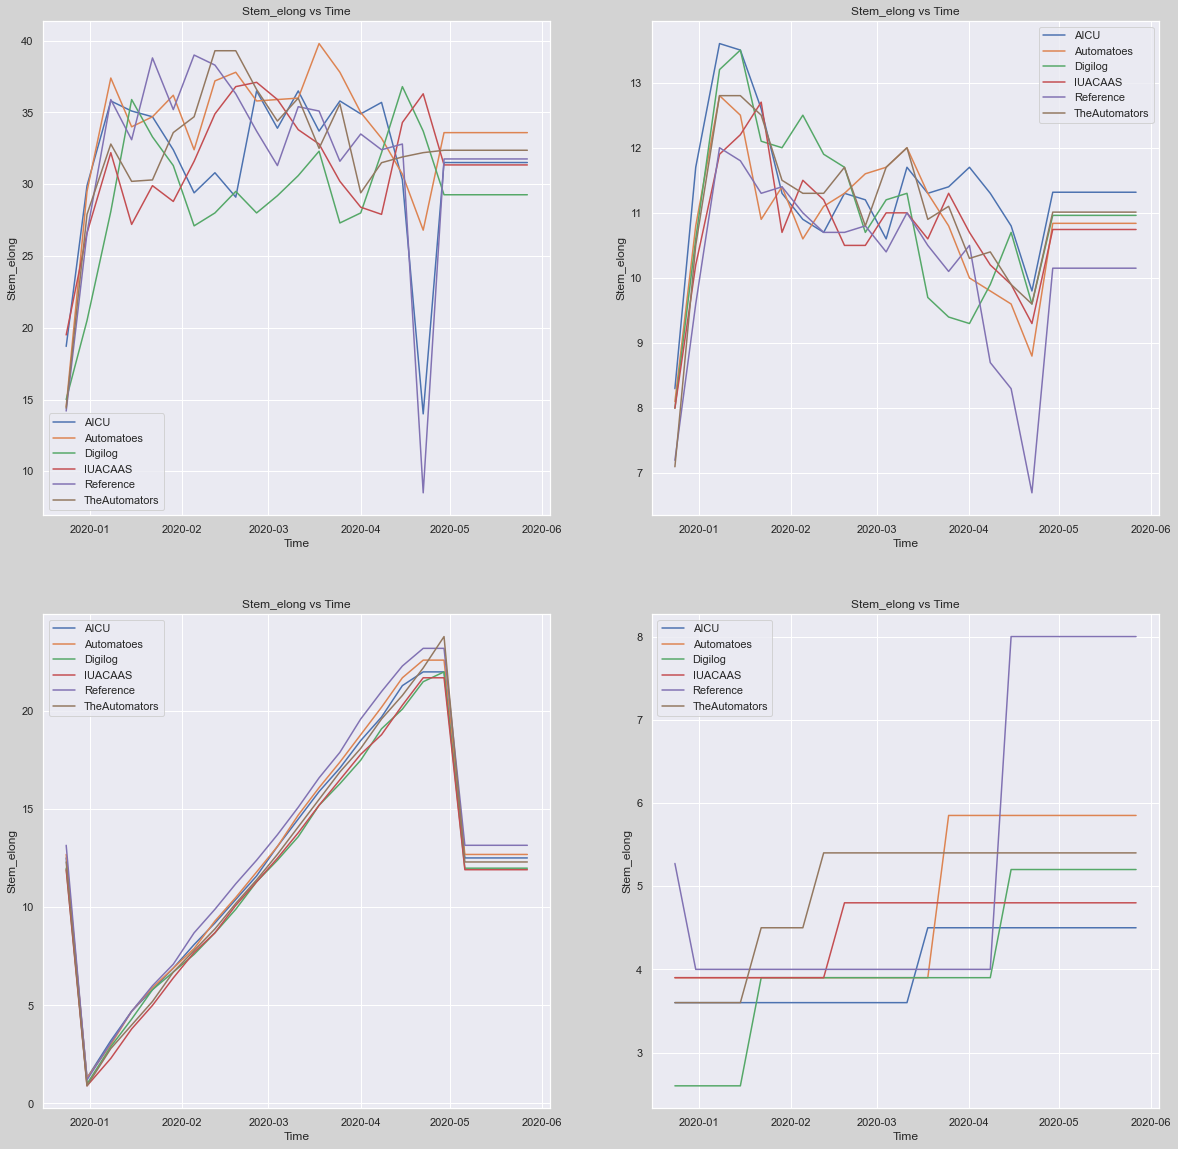

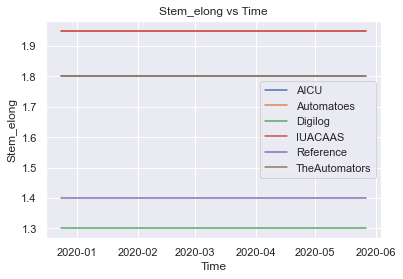

In [70]:
sns.set()
plt.figure(figsize=(20, 20),facecolor='lightgray')

plt.subplot(221)
for i in dataframe:
    plt.plot(dataframe[i]["%Time"], dataframe[i]["Stem_elong"])
plt.legend(files)
plt.title("Stem_elong vs Time")
plt.xlabel("Time")
plt.ylabel("Stem_elong")


plt.subplot(222)
for i in dataframe:
    plt.plot(dataframe[i]["%Time"], dataframe[i]["Stem_thick"])
plt.legend(files)
plt.title("Stem_elong vs Time")
plt.xlabel("Time")
plt.ylabel("Stem_elong")


plt.subplot(223)
for i in dataframe:
    plt.plot(dataframe[i]["%Time"], dataframe[i]["Cum_trusses"])
plt.legend(files)
plt.title("Stem_elong vs Time")
plt.xlabel("Time")
plt.ylabel("Stem_elong")


plt.subplot(224)
for i in dataframe:
    plt.plot(dataframe[i]["%Time"], dataframe[i]["stem_dens "])
plt.legend(files)
plt.title("Stem_elong vs Time")
plt.xlabel("Time")
plt.ylabel("Stem_elong")
plt.show()



#Stem_thick  Cum_trusses  stem_dens   plant_dens

In [80]:

def plot(target):
    
    sns.set()
    plt.figure(figsize=(20, 20),facecolor='lightgray')

    plt.subplot(221)
    for i in dataframe:
        plt.plot(dataframe[i][target], dataframe[i]["Stem_elong"])
    plt.legend(files)
    plt.title("Stem_elong vs {target}".format(target=target))
    plt.xlabel('Stem_elong')
    plt.ylabel(target)


    plt.subplot(222)
    for i in dataframe:
        plt.plot(dataframe[i][target], dataframe[i]['Stem_thick'])
    plt.legend(files)
    plt.title("Stem_thick vs {target}".format(target=target))
    plt.xlabel('Stem_thick')
    plt.ylabel(target)


    plt.subplot(223)
    for i in dataframe:
        plt.plot(dataframe[i][target], dataframe[i]['Cum_trusses'])
    plt.legend(files)
    plt.title("{Cum_trusses vs {target}".format(target=target))
    plt.xlabel(var)
    plt.ylabel(target)


    plt.subplot(224)
    for i in dataframe:
        plt.plot(dataframe[i][target], dataframe[i]['stem_dens '])
    plt.legend(files)
    plt.title("stem_dens vs {target}".format( target=target))
    plt.xlabel(var)
    plt.ylabel(target)
    
    plt.show()



#Stem_thick  Cum_trusses  stem_dens   plant_dens

NameError: name 'var' is not defined

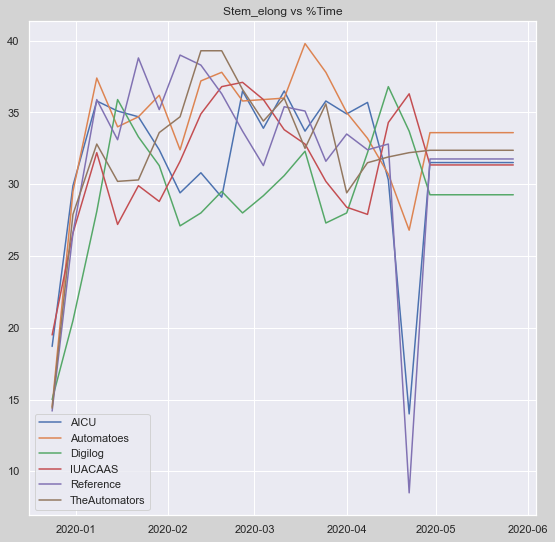

In [81]:
plot("%Time")

In [75]:
for i,j in range(10):
    print(i, " ", j, "\n")

TypeError: cannot unpack non-iterable int object

In [76]:
print("22"+"1")

221
